In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
dataset_train=pd.read_excel(r"Datasets/Data_Train.xlsx")

In [3]:
dataset_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
dataset_train=dataset_train.dropna()

In [6]:
dataset_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
dataset_train["trip_day"]=pd.to_datetime(dataset_train["Date_of_Journey"],format="%d/%m/%Y").dt.day
dataset_train["trip_month"]=pd.to_datetime(dataset_train["Date_of_Journey"],format="%d/%m/%Y").dt.month
#splitting the day and month into two colums so that we can identify the dluctuation in price based on busy days and months

In [8]:
#since we have the important details related the Date_of_Journey we can drop that column
dataset_train=dataset_train.drop(["Date_of_Journey"],axis=1)

In [9]:
dataset_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
#additional info is usless so we can drop it
dataset_train=dataset_train.drop(['Additional_Info'],axis=1)

In [11]:
#Routes and Total stops signify the same thing hence we can drop routes as well
dataset_train=dataset_train.drop(['Route'],axis=1)

In [12]:
#departure time separating hours and minutes
dataset_train["hour_d"]=pd.to_datetime(dataset_train["Dep_Time"]).dt.hour
dataset_train["min_d"]=pd.to_datetime(dataset_train["Dep_Time"]).dt.minute

#arrival time separating hour and minutes
dataset_train["hour_a"]=pd.to_datetime(dataset_train["Arrival_Time"]).dt.hour
dataset_train['min_a']=pd.to_datetime(dataset_train["Arrival_Time"]).dt.minute


In [13]:
dataset_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,hour_a,min_a
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35


In [14]:
dataset_train=dataset_train.drop(["Dep_Time","Arrival_Time"],axis=1)

In [15]:
dataset_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,hour_a,min_a
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [16]:
dataset_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [17]:
dataset_train=dataset_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [18]:
dataset_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,hour_a,min_a
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


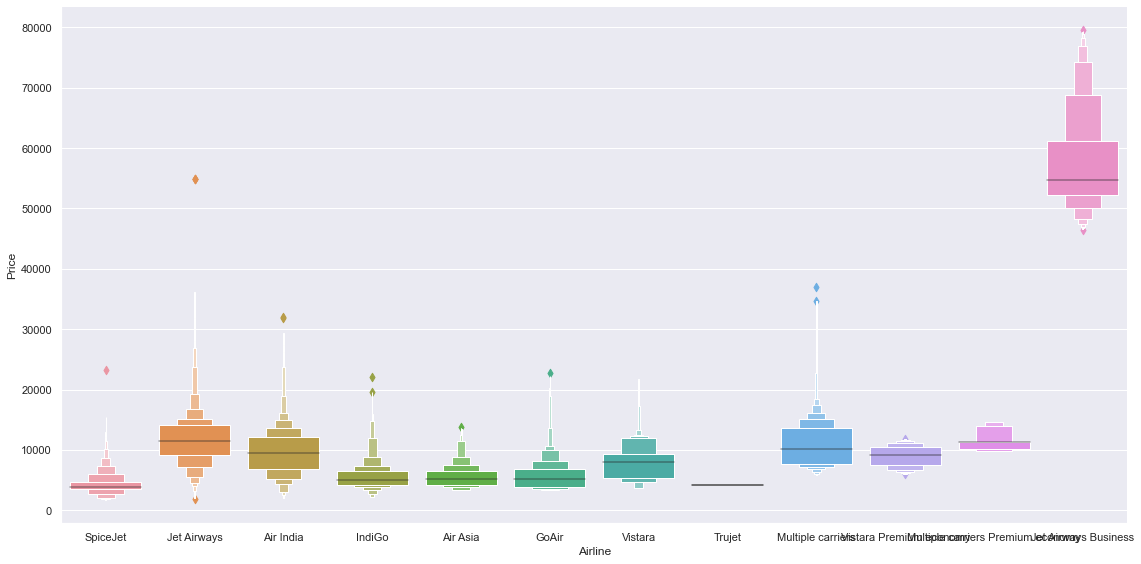

In [19]:
#catplot is to plot categorical data
sns.catplot(y="Price",x="Airline",data=dataset_train.sort_values("Price"),kind='boxen',aspect=2,height=8)

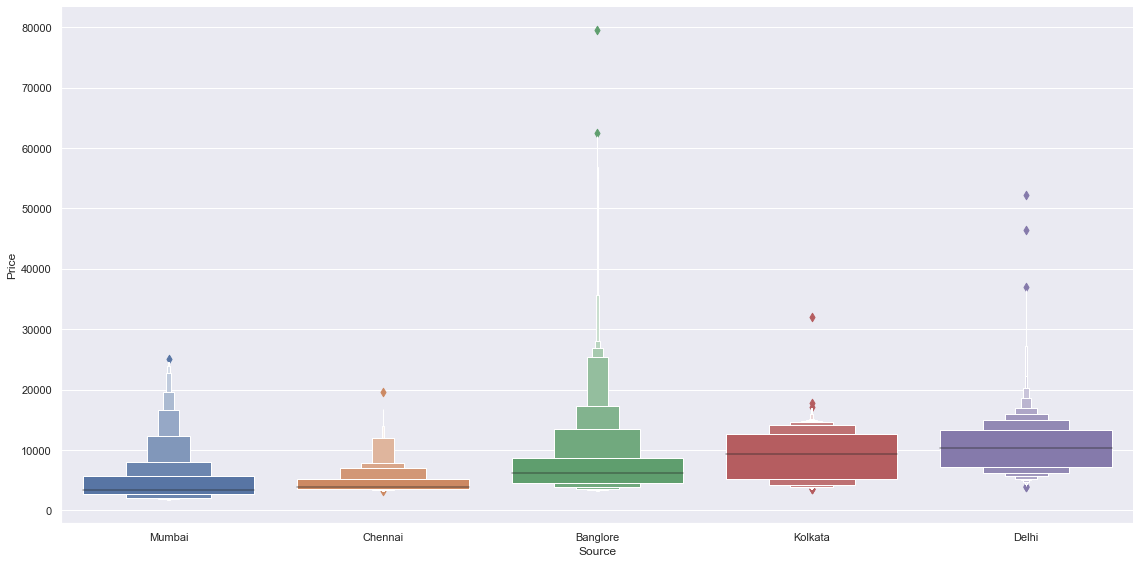

In [20]:
sns.catplot(y="Price",x="Source",data=dataset_train.sort_values("Price"),kind='boxen',aspect=2,height=8)

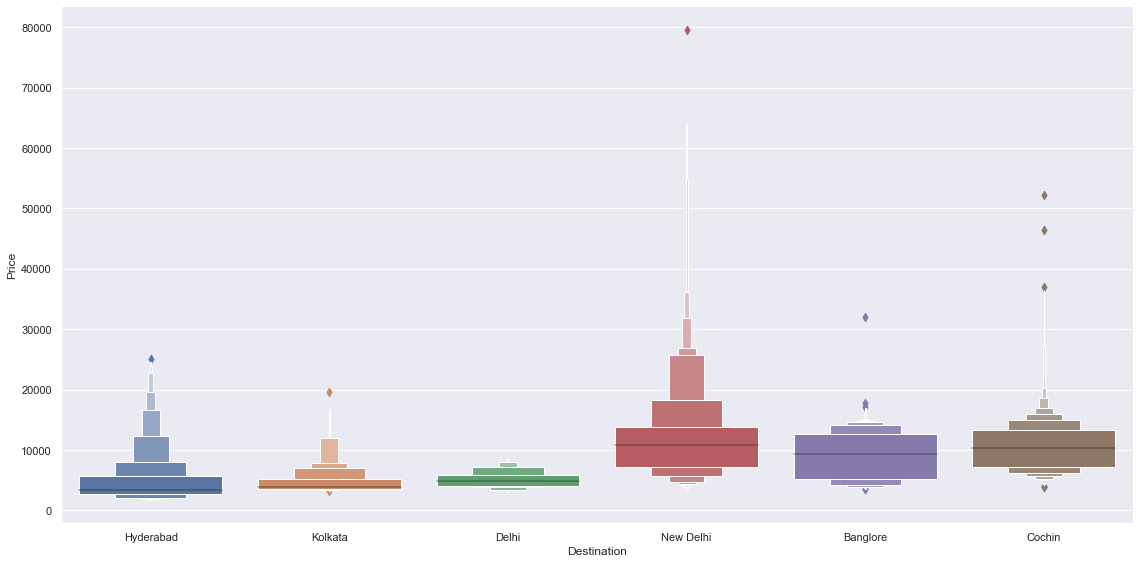

In [21]:
sns.catplot(y="Price",x="Destination",data=dataset_train.sort_values("Price"),kind='boxen',aspect=2,height=8)

In [22]:
Airline_dummy=dataset_train["Airline"]
Airline_dummy=pd.get_dummies(Airline_dummy,drop_first=True)
Source_dummy=dataset_train["Source"]
Source_dummy=pd.get_dummies(Source_dummy,drop_first=True)
Destination_dummy=dataset_train["Destination"]
Destination_dummy=pd.get_dummies(Destination_dummy,drop_first=True)


In [23]:
Airline_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
Source_dummy.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
Destination_dummy.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
dataset_train=pd.concat([dataset_train,Airline_dummy,Source_dummy,Destination_dummy],axis=1)

In [27]:
dataset_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [28]:
dataset_train=dataset_train.drop(["Airline","Source","Destination"],axis=1)

In [29]:
"2h 50m".split()

['2h', '50m']

In [30]:
# Assigning and converting Duration column into list
dur_of_journey = list(dataset_train["Duration"])

for i in range(len(dur_of_journey)):
    if len(dur_of_journey[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur_of_journey[i]:
            dur_of_journey[i] = dur_of_journey[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur_of_journey[i] = "0h " + dur_of_journey[i]           # Adds 0 hour

dur_hours = []
dur_mins = []
for i in range(len(dur_of_journey)):
    dur_hours.append(int(dur_of_journey[i].split(sep = "h")[0]))    # Extract hours from duration
    dur_mins.append(int(dur_of_journey[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [31]:
dataset_train["hours_of_duration"]=dur_hours
dataset_train["minutes_of_dur"]=dur_mins

In [32]:
dataset_train.head()

,Duration,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,hour_a,min_a,Air India,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,hours_of_duration,minutes_of_dur
0,2h 50m,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,1,2,50
1,7h 25m,2,7662,1,5,5,50,13,15,1,...,0,1,0,0,0,0,0,0,7,25
2,19h,2,13882,9,6,9,25,4,25,0,...,1,0,0,1,0,0,0,0,19,0
3,5h 25m,1,6218,12,5,18,5,23,30,0,...,0,1,0,0,0,0,0,0,5,25
4,4h 45m,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,1,4,45


In [33]:
dataset_train=dataset_train.drop(["Duration"],axis=1)

In [34]:
pd.set_option('display.max_columns',None)

In [35]:
dataset_train.head()

,Total_Stops,Price,trip_day,trip_month,hour_d,min_d,hour_a,min_a,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,hours_of_duration,minutes_of_dur
0,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,50
1,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,25
2,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,19,0
3,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,25
4,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,45


In [36]:
#test data

In [37]:
dataset_test=pd.read_excel(r"Datasets/Test_set.xlsx")

In [38]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
dataset_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [40]:
dataset_test["trip_day"]=pd.to_datetime(dataset_test["Date_of_Journey"],format="%d/%m/%Y").dt.day
dataset_test["trip_month"]=pd.to_datetime(dataset_test["Date_of_Journey"],format="%d/%m/%Y").dt.month
#splitting the day and month into two colums so that we can identify the dluctuation in price based on busy days and months

In [41]:
#since we have the important details related the Date_of_Journey we can drop that column
dataset_test=dataset_test.drop(["Date_of_Journey"],axis=1)

In [42]:
#additional info is usless so we can drop it
dataset_test=dataset_test.drop(['Additional_Info','Route'],axis=1)

In [43]:
#departure time separating hours and minutes
dataset_test["hour_d"]=pd.to_datetime(dataset_test["Dep_Time"]).dt.hour
dataset_test["min_d"]=pd.to_datetime(dataset_test["Dep_Time"]).dt.minute

#arrival time separating hour and minutes
dataset_test["hour_a"]=pd.to_datetime(dataset_test["Arrival_Time"]).dt.hour
dataset_test['min_a']=pd.to_datetime(dataset_test["Arrival_Time"]).dt.minute

In [44]:
dataset_test=dataset_test.drop(["Dep_Time","Arrival_Time"],axis=1)

In [45]:
dataset_test=dataset_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [46]:
Airline_dummy=dataset_test["Airline"]
Airline_dummy=pd.get_dummies(Airline_dummy,drop_first=True)
Source_dummy=dataset_test["Source"]
Source_dummy=pd.get_dummies(Source_dummy,drop_first=True)
Destination_dummy=dataset_test["Destination"]
Destination_dummy=pd.get_dummies(Destination_dummy,drop_first=True)


In [47]:
dataset_test=pd.concat([dataset_test,Airline_dummy,Source_dummy,Destination_dummy],axis=1)

In [48]:
dataset_test=dataset_test.drop(["Airline","Source","Destination"],axis=1)

In [49]:
# Assigning and converting Duration column into list
dur_of_journey = list(dataset_test["Duration"])

for i in range(len(dur_of_journey)):
    if len(dur_of_journey[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur_of_journey[i]:
            dur_of_journey[i] = dur_of_journey[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur_of_journey[i] = "0h " + dur_of_journey[i]           # Adds 0 hour

dur_hours = []
dur_mins = []
for i in range(len(dur_of_journey)):
    dur_hours.append(int(dur_of_journey[i].split(sep = "h")[0]))    # Extract hours from duration
    dur_mins.append(int(dur_of_journey[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [50]:
dataset_test["hours_of_duration"]=dur_hours
dataset_test["minutes_of_duration"]=dur_mins

In [51]:
dataset_test=dataset_test.drop(["Duration"],axis=1)

In [52]:
dataset_test.head()

,Total_Stops,trip_day,trip_month,hour_d,min_d,hour_a,min_a,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,hours_of_duration,minutes_of_duration
0,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10,55
1,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0
2,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,23,45
3,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,13,0
4,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,50


In [53]:
#feature selection

In [54]:
dataset_train.shape

(10682, 30)

In [55]:
dataset_train.columns

Index(['Total_Stops', 'Price', 'trip_day', 'trip_month', 'hour_d', 'min_d',
       'hour_a', 'min_a', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'hours_of_duration', 'minutes_of_dur'],
      dtype='object')

In [56]:
X = dataset_train.drop(['Price'],axis=1)
X.head()

,Total_Stops,trip_day,trip_month,hour_d,min_d,hour_a,min_a,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,hours_of_duration,minutes_of_dur
0,0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,50
1,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,25
2,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,19,0
3,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,25
4,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,45


In [57]:
y = dataset_train["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

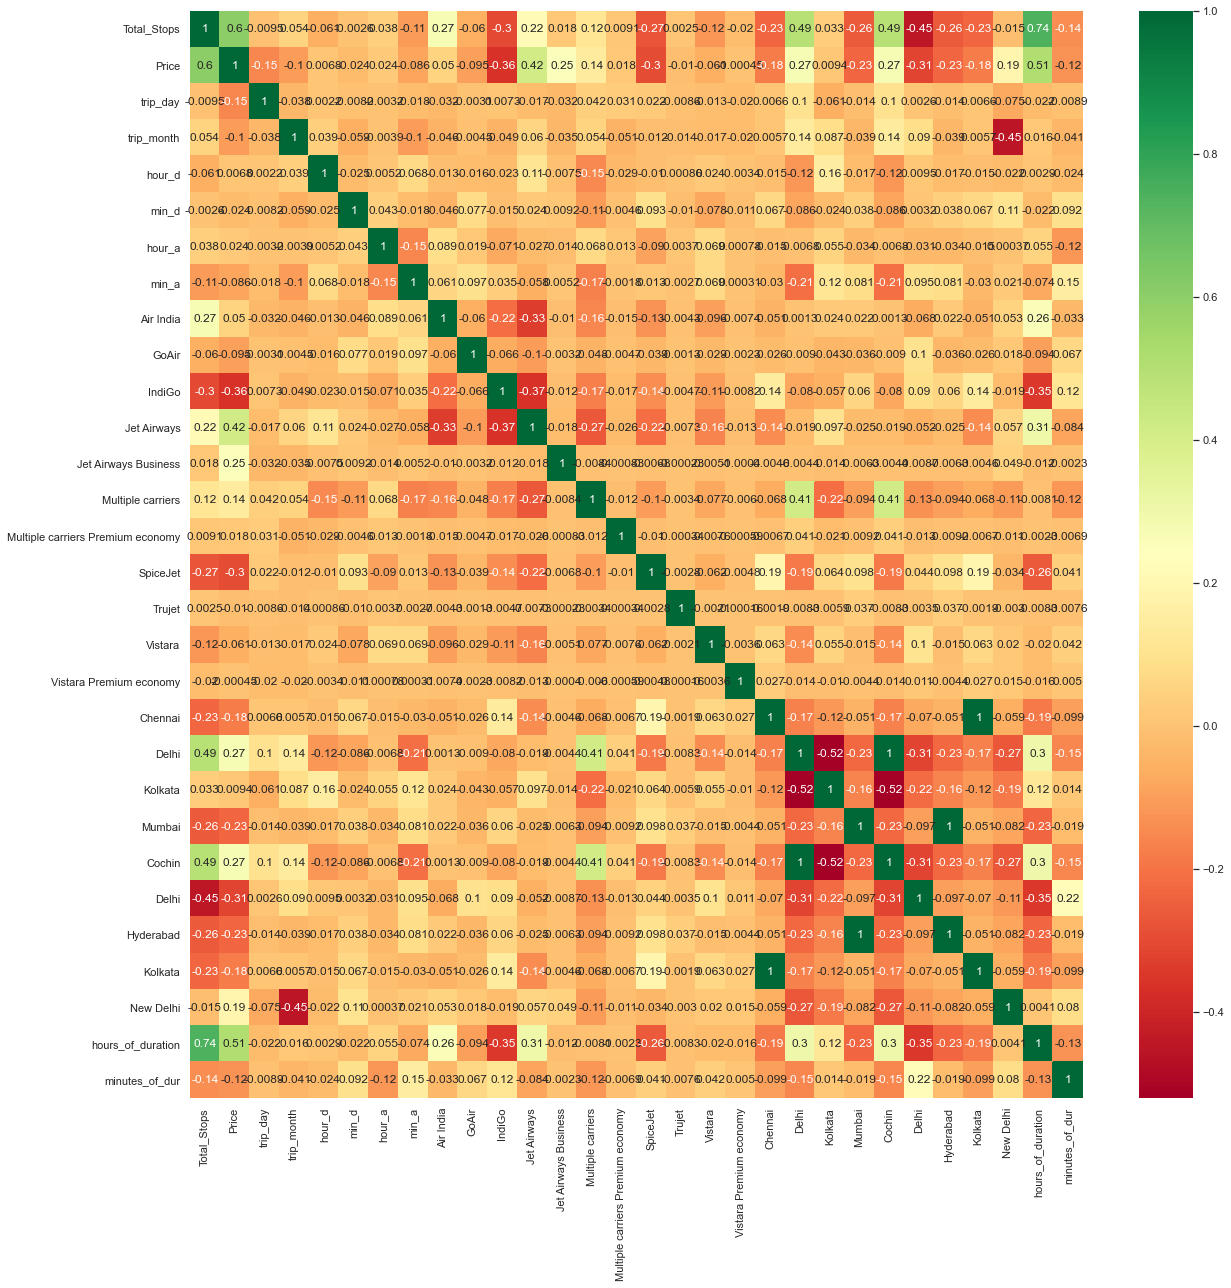

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset_train.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(X, y)

ExtraTreesRegressor()

In [60]:
print(regressor.feature_importances_)

[2.36416764e-01 1.43692274e-01 5.35053634e-02 2.37808535e-02
 2.16132622e-02 2.77133482e-02 2.01246672e-02 8.65780861e-03
 1.94801653e-03 1.69881683e-02 1.43379103e-01 6.71367115e-02
 1.93545505e-02 9.03776429e-04 2.95932854e-03 1.09637232e-04
 4.90966488e-03 8.13056751e-05 4.55390341e-04 8.85986635e-03
 3.46044701e-03 7.22795310e-03 1.10983519e-02 1.60780510e-02
 5.85102715e-03 4.43641519e-04 2.48878583e-02 1.11648627e-01
 1.67141828e-02]


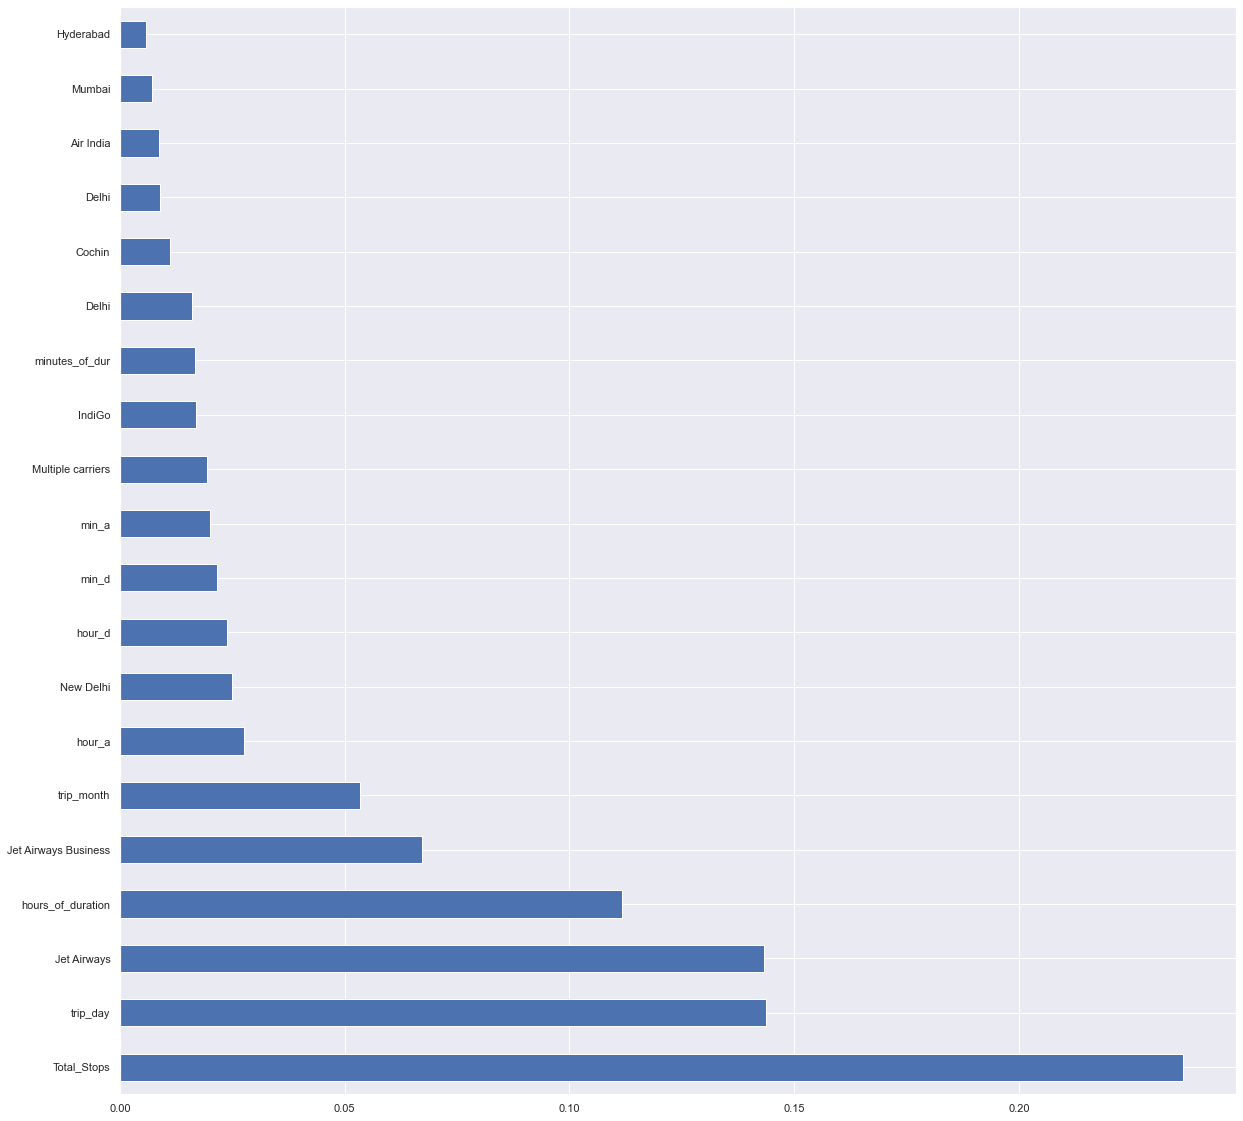

In [61]:
plt.figure(figsize=(20,20))
features=pd.Series(regressor.feature_importances_,index=X.columns)
features.nlargest(20).plot(kind='barh')
plt.show()

In [62]:
#using random forest search regression

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor_rand=RandomForestRegressor()
regressor_rand.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
predictions=regressor_rand.predict(X_test)

In [66]:
train_set_score=regressor_rand.score(X_train,y_train)
test_set_score=regressor_rand.score(X_test,y_test)
print(train_set_score,test_set_score)

0.9562828975917904 0.8030811987208537


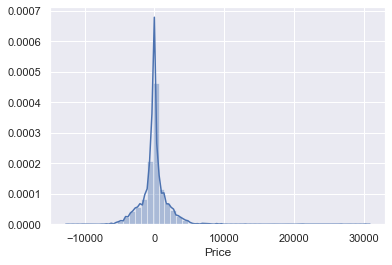

In [67]:
sns.distplot(y_test-predictions)

Text(0, 0.5, 'Predictions')

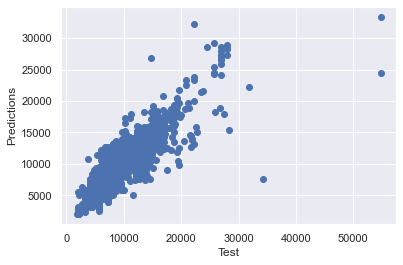

In [68]:
plt.scatter(y_test,predictions)
plt.xlabel('Test')
plt.ylabel('Predictions')

In [69]:
from sklearn import metrics

In [70]:
print("Mean Squared error")
print(metrics.mean_squared_error(y_test,predictions))

Mean Squared error
4005327.781739577


In [71]:
print("Mean absolute error")
print(metrics.mean_absolute_error(y_test,predictions))

Mean absolute error
1194.3417113797107


In [72]:
print('root mean squared error')
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

root mean squared error
2001.3315022103602


In [73]:
#hyperparameter tuning is done to get the best parameters and best scores

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
#n estimators defines how many trees should be there in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [76]:
#number of feaatures to be considered
max_features=['auto','sqrt']

In [77]:
#maximum number of levels in trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

In [78]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
#creating a grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    
}

In [80]:
rand_hype = RandomizedSearchCV(estimator = regressor_rand, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
rand_hype.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rand_hype.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [83]:
prediction1=rand_hype.predict(X_test)

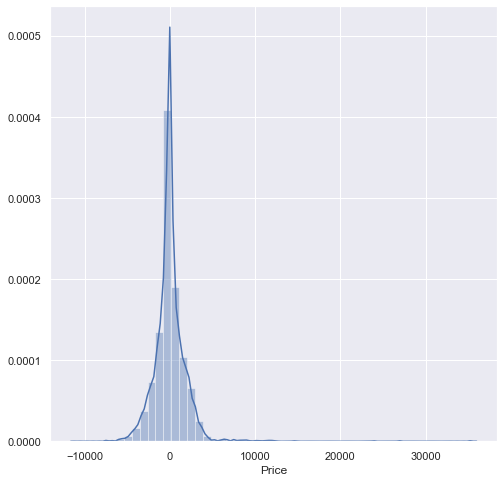

In [84]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction1)
plt.show()

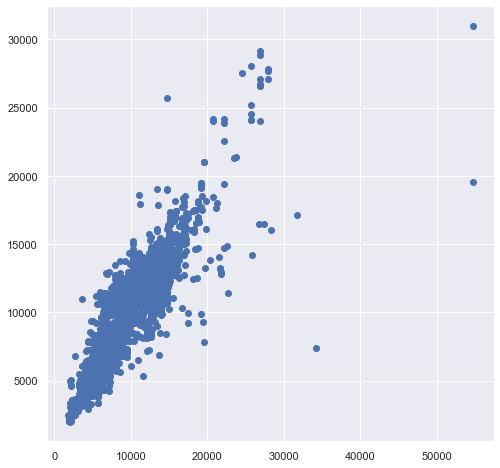

In [85]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction1)
plt.show()

In [86]:
print("Mean Squared error")
print(metrics.mean_squared_error(y_test,prediction1))

Mean Squared error
3894539.7561712856


In [87]:
print("Mean absolute error")
print(metrics.mean_absolute_error(y_test,prediction1))

Mean absolute error
1190.9224293428326


In [88]:
print('root mean squared error')
print(np.sqrt(metrics.mean_squared_error(y_test,prediction1)))

root mean squared error
1973.4588306248716


In [90]:
import pickle
# open a file, where you ant to store the data
file = open('flight_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor_rand, file)

In [91]:
model = open('flight_model.pkl','rb')
forest = pickle.load(model)

In [92]:
y_prediction = forest.predict(X_test)

In [93]:
metrics.r2_score(y_test, y_prediction)

0.8030811987208537